In [1]:
"""
START INTRODUCTION WORK
"""

'\nSTART INTRODUCTION WORK\n'

In [2]:
import sys
sys.path.append('/Users/c/Desktop/Desktop_Funnel/anaconda3/lib/python3.9/site-packages')

import pandas as pd
import geopandas as gpd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

from gerrychain import (Partition, Graph, MarkovChain,
                        updaters, constraints, accept,
                        GeographicPartition)
from gerrychain.proposals import recom
from gerrychain.tree import bipartition_tree
from gerrychain.constraints import contiguous
from functools import partial

In [3]:
import random
random.seed(42)

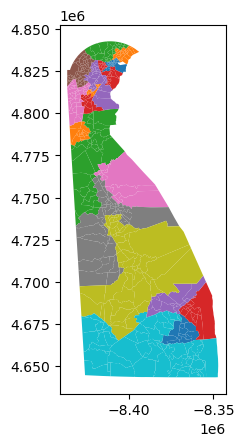

In [8]:
graph = Graph.from_file("DE_precincts.geojson")
    
my_updaters = {
    "population": updaters.Tally("POPULATION", alias="population"),
    "cut_edges": updaters.cut_edges,
    "perimeter": updaters.perimeter,
    "area": updaters.Tally("area", alias="area"),
}

initial_partition = GeographicPartition(
    graph,
    assignment="DISTRICT",
    updaters=my_updaters
)

initial_partition.plot()
plt.show()

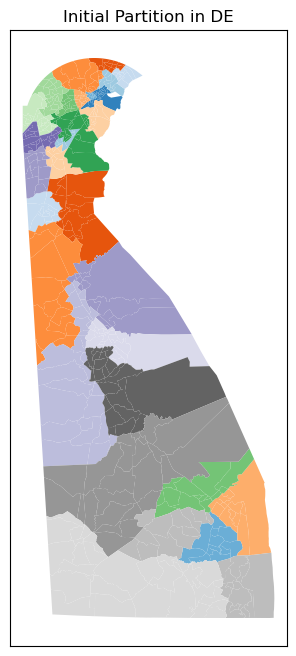

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Initial Partition in DE")
initial_partition.plot(ax=ax, cmap='tab20c')
plt.show()

In [10]:
ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)


proposal = partial(
    recom,
    pop_col="POPULATION",
    pop_target=ideal_population,
    epsilon=0.01,
    node_repeats=2,
)

recom_chain = MarkovChain(
    proposal=proposal,
    constraints=[contiguous],
    accept=accept.always_accept,
    initial_state=initial_partition,
    total_steps=20,
)

In [138]:
%matplotlib inline
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

import pandas as pd

import matplotlib.cm as mcm
import matplotlib.pyplot as plt
import networkx as nx
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output

frames = []
district_data = []

for i, partition in enumerate(recom_chain):
    for district_name in partition.perimeter.keys():
        population = partition.population[district_name]
        perimeter = partition.perimeter[district_name]
        area = partition.area[district_name]
        district_data.append((i, district_name, population, perimeter, area))

    buffer = io.BytesIO()
    fig, ax = plt.subplots(figsize=(10,10))
    partition.plot(ax=ax, cmap='tab20')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image = Image.open(buffer)
    frames.append(image)
    plt.close(fig)

df = pd.DataFrame(
    district_data,
    columns=[
        'step',
        'district_name',
        'population',
        'perimeter',
        'area'
    ]
)

def show_frame(idx):
    clear_output(wait=True)
    display(frames[idx])
    


slider = widgets.IntSlider(value=0, min=0, max=len(frames)-1, step=1, description='Frame:')
slider.layout.width = '500px'
widgets.interactive(show_frame, idx=slider)
# show_frame(2)

/Users/c/Desktop/Desktop_Funnel/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


interactive(children=(IntSlider(value=0, description='Frame:', layout=Layout(width='500px'), max=19), Output()…

/Users/c/Desktop/Desktop_Funnel/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/interaction.py:57: DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`
  from ipykernel.pylab.backend_inline import flush_figures


In [7]:
df.head(5)

,step,district_name,population,perimeter,area
0,0,27,24954,54719.068826,1.308136e+08
1,0,33,23735,142429.428754,7.794911e+08
2,0,20,23078,132885.416972,3.544749e+08
3,0,28,25703,147814.180372,7.777309e+08
4,0,41,25242,127053.034177,5.672241e+08


In [ ]:
"""
START PARTITION WORK
"""

In [11]:
from gerrychain import Partition, Graph
from gerrychain.updaters import cut_edges

graph = Graph.from_file("DE_precincts.geojson")
# graph = Graph.from_json("PA_VTDs.json")

In [12]:
graph.issue_warnings()

In [13]:
partition = Partition(graph, "DISTRICT", {"cut_edges": cut_edges})
# partition = Partition(graph, "2011_PLA_1", {"cut_edges": cut_edges})

In [14]:
partition.graph

In [15]:
partition.graph.nodes[0]

{'boundary_node': False,
 'area': 1162304.2518574775,
 'id': '0',
 'OBJECTID': 1,
 'DISTRICT': '01',
 'POPULATION': 1602,
 'RDED': '01-01',
 'Shape__Are': 1162304.25185737,
 'Shape__Len': 6304.852443497861,
 'TOTAL_REG': 1254,
 'ETH1_EUR': 211,
 'ETH1_HISP': 48,
 'ETH1_AA': 936,
 'ETH1_ESA': 17,
 'ETH1_UNK': 30,
 'VOTERS_GENDER_M': 531,
 'VOTERS_GENDER_F': 698,
 'VOTERS_GENDER_UNKNOWN': 25,
 'PARTY_DEM': 989,
 'PARTY_REP': 81,
 'PARTY_OTHER': 184,
 'geometry': <POLYGON ((-8408310.892 4832443.444, -8408328.258 4832423.457, -8408337.608 ...>}

In [16]:
first_ten_nodes = list(partition.graph.nodes)[:10]
for node in first_ten_nodes:
    print(partition.assignment[node])

01
01
01
01
01
01
01
01
01
01


In [17]:
for part in partition.parts:
    number_of_nodes = len(partition.parts[part])
    print(f"Part {part} has {number_of_nodes} nodes")

Part 01 has 16 nodes
Part 02 has 21 nodes
Part 03 has 14 nodes
Part 04 has 12 nodes
Part 05 has 11 nodes
Part 06 has 15 nodes
Part 07 has 14 nodes
Part 08 has 11 nodes
Part 09 has 13 nodes
Part 10 has 12 nodes
Part 11 has 14 nodes
Part 12 has 17 nodes
Part 13 has 15 nodes
Part 14 has 11 nodes
Part 15 has 11 nodes
Part 16 has 13 nodes
Part 17 has 14 nodes
Part 18 has 9 nodes
Part 19 has 13 nodes
Part 20 has 13 nodes
Part 21 has 15 nodes
Part 22 has 13 nodes
Part 23 has 12 nodes
Part 24 has 12 nodes
Part 25 has 11 nodes
Part 26 has 9 nodes
Part 27 has 16 nodes
Part 28 has 14 nodes
Part 29 has 12 nodes
Part 30 has 17 nodes
Part 31 has 10 nodes
Part 32 has 12 nodes
Part 33 has 12 nodes
Part 34 has 11 nodes
Part 35 has 13 nodes
Part 36 has 11 nodes
Part 37 has 12 nodes
Part 38 has 14 nodes
Part 39 has 9 nodes
Part 40 has 9 nodes
Part 41 has 14 nodes


In [18]:
for part, subgraph in partition.subgraphs.items():
    number_of_edges = len(subgraph.edges)
    print(f"Part {part} has {number_of_edges} edges")

Part 01 has 26 edges
Part 02 has 36 edges
Part 03 has 26 edges
Part 04 has 25 edges
Part 05 has 14 edges
Part 06 has 25 edges
Part 07 has 26 edges
Part 08 has 22 edges
Part 09 has 21 edges
Part 10 has 19 edges
Part 11 has 22 edges
Part 12 has 30 edges
Part 13 has 27 edges
Part 14 has 23 edges
Part 15 has 18 edges
Part 16 has 24 edges
Part 17 has 19 edges
Part 18 has 12 edges
Part 19 has 24 edges
Part 20 has 25 edges
Part 21 has 28 edges
Part 22 has 23 edges
Part 23 has 19 edges
Part 24 has 24 edges
Part 25 has 21 edges
Part 26 has 15 edges
Part 27 has 31 edges
Part 28 has 21 edges
Part 29 has 18 edges
Part 30 has 33 edges
Part 31 has 19 edges
Part 32 has 18 edges
Part 33 has 20 edges
Part 34 has 21 edges
Part 35 has 24 edges
Part 36 has 19 edges
Part 37 has 18 edges
Part 38 has 29 edges
Part 39 has 17 edges
Part 40 has 16 edges
Part 41 has 27 edges


In [19]:
import networkx
for part, subgraph in partition.subgraphs.items():
    diameter = networkx.diameter(subgraph)
    print(f"Part {part} has diameter {diameter}")

Part 01 has diameter 7
Part 02 has diameter 5
Part 03 has diameter 5
Part 04 has diameter 3
Part 05 has diameter 6
Part 06 has diameter 5
Part 07 has diameter 4
Part 08 has diameter 3
Part 09 has diameter 5
Part 10 has diameter 5
Part 11 has diameter 6
Part 12 has diameter 5
Part 13 has diameter 4
Part 14 has diameter 3
Part 15 has diameter 4
Part 16 has diameter 4
Part 17 has diameter 6
Part 18 has diameter 5
Part 19 has diameter 4
Part 20 has diameter 4
Part 21 has diameter 4
Part 22 has diameter 4
Part 23 has diameter 4
Part 24 has diameter 3
Part 25 has diameter 3
Part 26 has diameter 4
Part 27 has diameter 5
Part 28 has diameter 7
Part 29 has diameter 5
Part 30 has diameter 6
Part 31 has diameter 3
Part 32 has diameter 5
Part 33 has diameter 5
Part 34 has diameter 3
Part 35 has diameter 4
Part 36 has diameter 4
Part 37 has diameter 6
Part 38 has diameter 4
Part 39 has diameter 3
Part 40 has diameter 4
Part 41 has diameter 4


In [20]:
"""
START RECOM WORK
"""

'\nSTART RECOM WORK\n'

In [21]:
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain,
                        proposals, updaters, constraints, accept, Election)
from gerrychain.proposals import recom
from PIL import Image
import pandas

In [32]:
"""graph = Graph.from_json("PA_VTDs.json")

elections = [
    Election("SEN10", {"Democratic": "SEN10D", "Republican": "SEN10R"}),
    Election("SEN12", {"Democratic": "USS12D", "Republican": "USS12R"}),
    Election("SEN16", {"Democratic": "T16SEND", "Republican": "T16SENR"}),
    Election("PRES12", {"Democratic": "PRES12D", "Republican": "PRES12R"}),
    Election("PRES16", {"Democratic": "T16PRESD", "Republican": "T16PRESR"})
]"""

graph = Graph.from_file("DE_precincts.geojson")

elections = [
    Election("REPXX", {"Democratic": "PARTY_DEM", "Republican": "PARTY_REP"})
]

In [33]:
# Population updater, for computing how close to equality the district
# populations are. "TOTPOP" is the population column from our shapefile.
my_updaters = {"population": updaters.Tally("POPULATION", alias="population")}

# Election updaters, for computing election results using the vote totals
# from our shapefile.
election_updaters = {election.name: election for election in elections}
my_updaters.update(election_updaters)

In [34]:
initial_partition = GeographicPartition(
    graph, 
    assignment="DISTRICT", 
    updaters=my_updaters
)

In [35]:
initial_partition.graph.nodes[0]

{'boundary_node': False,
 'area': 1162304.2518574775,
 'id': '0',
 'OBJECTID': 1,
 'DISTRICT': '01',
 'POPULATION': 1602,
 'RDED': '01-01',
 'Shape__Are': 1162304.25185737,
 'Shape__Len': 6304.852443497861,
 'TOTAL_REG': 1254,
 'ETH1_EUR': 211,
 'ETH1_HISP': 48,
 'ETH1_AA': 936,
 'ETH1_ESA': 17,
 'ETH1_UNK': 30,
 'VOTERS_GENDER_M': 531,
 'VOTERS_GENDER_F': 698,
 'VOTERS_GENDER_UNKNOWN': 25,
 'PARTY_DEM': 989,
 'PARTY_REP': 81,
 'PARTY_OTHER': 184,
 'geometry': <POLYGON ((-8408310.892 4832443.444, -8408328.258 4832423.457, -8408337.608 ...>}

In [43]:
# The ReCom proposal needs to know the ideal population for the districts so that
# we can improve speed by bailing early on unbalanced partitions.

ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)

# We use functools.partial to bind the extra parameters (pop_col, pop_target, epsilon, node_repeats)
# of the recom proposal.
proposal = partial(
    recom,
    pop_col="POPULATION",
    pop_target=ideal_population,
    epsilon=0.02,
    node_repeats=2,
    method = partial(
        bipartition_tree,
        max_attempts=100,
        allow_pair_reselection=True
    )
)

In [44]:
def cut_edges_length(p):
  return len(p["cut_edges"])

compactness_bound = constraints.UpperBound(
  cut_edges_length,
  2*len(initial_partition["cut_edges"])
)

pop_constraint = constraints.within_percent_of_ideal_population(initial_partition, 0.1)

In [45]:
pop_constraint

<Bounds(population,(21730.565853658536, 26559.58048780488))>

In [46]:
compactness_bound

<UpperBound(cut_edges_length >= 942)>

In [47]:
compactness_bound = constraints.UpperBound(
  lambda p: len(p["cut_edges"]),
  2*len(initial_partition["cut_edges"])
)

In [48]:
chain = MarkovChain(
    proposal=proposal,
    constraints=[
        pop_constraint,
        compactness_bound
    ],
    accept=accept.always_accept,
    initial_state=initial_partition,
    total_steps=1000
)

In [49]:
from tqdm import tqdm
# This might take a few minutes.
"""data = pandas.DataFrame(
    sorted(partition["REPXX"].percents("Democratic"))
    for partition in chain.with_progress_bar()
)""" # more elegant but doesnt keep track of the final partition

d_percents = []
for partition in chain.with_progress_bar():
    d_percents.append(sorted(partition["REPXX"].percents("Democratic")))
s
data = pandas.DataFrame(d_percents)

  0%|          | 0/1000 [00:00<?, ?it/s]

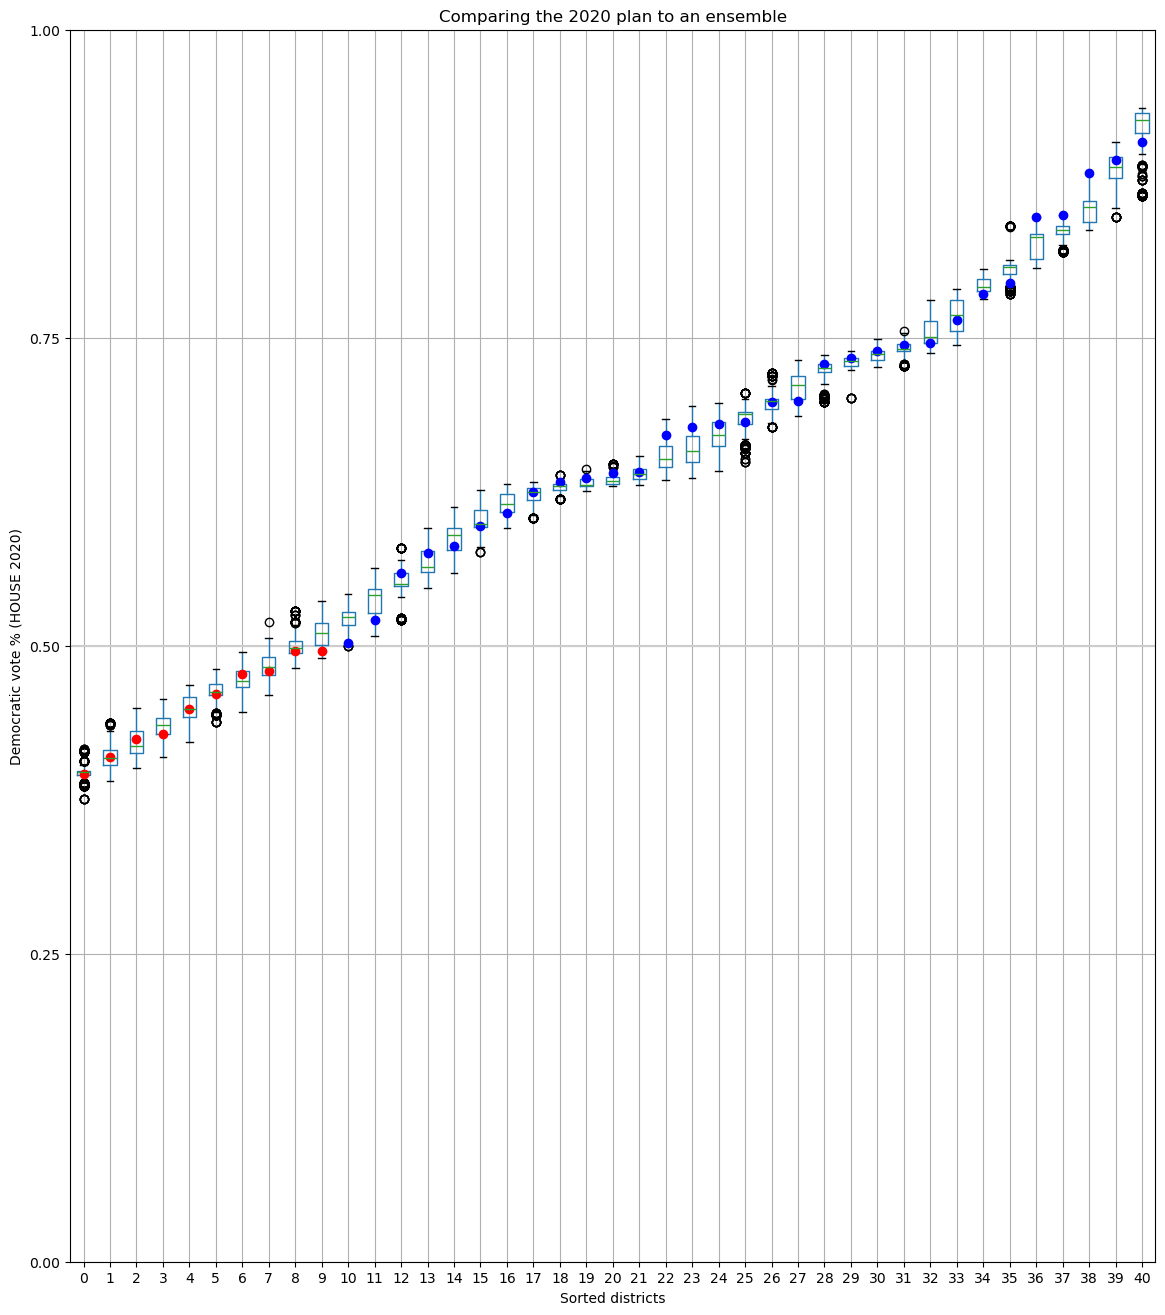

In [40]:
fig, ax = plt.subplots(figsize=(14, 16))

# Draw 50% line
ax.axhline(0.5, color="#cccccc")

# Draw boxplot
data.boxplot(ax=ax, positions=range(len(data.columns)))

# Draw initial plan's Democratic vote %s (.iloc[0] gives the first row)
# plt.plot(data.iloc[0], "ro")
# Plotting with condition
for index, value in data.iloc[0].items():
    if value > 0.5:
        plt.plot(index, value, "bo")
    else:
        plt.plot(index, value, "ro")

# Annotate
ax.set_title("Comparing the 2020 plan to an ensemble")
ax.set_ylabel("Democratic vote % (HOUSE 2020)")
ax.set_xlabel("Sorted districts")
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

plt.show()

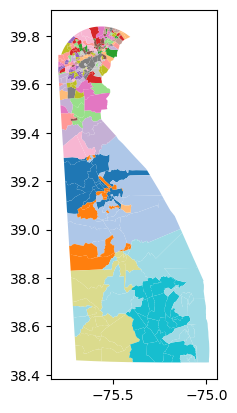

In [22]:
de = gpd.read_file('de_shapefile.zip')
de.plot(cmap='tab20')
plt.show()

In [28]:
print(data)

           0         1         2         3         4         5         6   \
0    0.396241  0.409415  0.424205  0.428367  0.448344  0.460813  0.477057   
1    0.396241  0.409415  0.424205  0.428367  0.448344  0.462359  0.477057   
2    0.396241  0.409415  0.424205  0.428367  0.448344  0.462359  0.477057   
3    0.396241  0.413343  0.424205  0.428367  0.448344  0.462359  0.474266   
4    0.396241  0.413343  0.424205  0.428367  0.448344  0.462359  0.474266   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.395589  0.398062  0.413282  0.433386  0.433748  0.468312  0.473073   
996  0.395589  0.398062  0.413282  0.433386  0.433748  0.468312  0.473073   
997  0.395589  0.398062  0.413282  0.433386  0.433748  0.468312  0.473073   
998  0.395589  0.398062  0.413282  0.433386  0.433748  0.468312  0.473073   
999  0.395589  0.398062  0.413282  0.433386  0.433748  0.468312  0.473073   

           7         8         9   ...        31        32        33       

In [34]:
# POSTPROCESSING: data for boxplot

# input fields you would like here
q1 = []
median = []
q3 = []
minimum = []
maximum = []

def get_bounds(q1, q3, col, bound=1.5):
    iqr = q3 - q1
    lower_bound = q1 - (bound * iqr)
    upper_bound = q3 + (bound * iqr)
    filtered_col = col[(col > lower_bound) & (col < upper_bound)]
    return filtered_col.min(), filtered_col.max()
    

for district in data.columns:
    lower = data[district].quantile(0.25)
    upper = data[district].quantile(.75)
    lower_bound, upper_bound = get_bounds(lower, upper, data[district])
    
    q1.append(lower)
    median.append( data[district].quantile(.5) )
    q3.append(upper)
    minimum.append(lower_bound)
    maximum.append(upper_bound)
    
print(f"MIN: {minimum}\n\n")
print(f"LOWER: {q1}\n\n")
print(f"MED: {median}\n\n")
print(f"UPPER: {q3}\n\n")
print(f"MAX: {maximum}\n\n")

MIN: [0.38956792526274814, 0.39040832049306623, 0.4006044959385429, 0.4096896628711766, 0.422047038895042, 0.4463959019392609, 0.4463959019392609, 0.4601606963508537, 0.48163815829808104, 0.4899300221880867, 0.5020981278244029, 0.5081121366737373, 0.5395470677708298, 0.5467950846894719, 0.559370123421762, 0.5802532075792336, 0.5956247027651335, 0.6064799632714633, 0.6215413588294945, 0.6251930908580255, 0.6293884951376298, 0.6303937520338432, 0.6348419094854308, 0.6364263539151431, 0.6414318354912414, 0.6678674915811732, 0.6804273566392907, 0.6861867968008676, 0.7124453466583386, 0.7237559645535105, 0.7262555517594806, 0.7306843267108167, 0.7378448889240257, 0.7444568102046057, 0.7813756141134435, 0.792326431181486, 0.8063360881542699, 0.8252345071505459, 0.8370888157894737, 0.855227334603866, 0.8994611457742484]


LOWER: [0.39473828747185147, 0.40309708159618823, 0.41307692307692306, 0.4283666643915091, 0.44214267140504465, 0.45986110073930253, 0.4661752284419873, 0.4765651154308716, 

<Axes: >

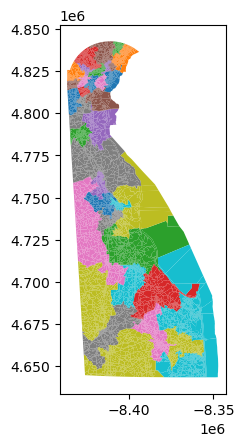

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
partition.plot(ax=ax, cmap='tab20')
ax.set_xticks([])
ax.set_yticks([])

In [39]:
# partition.graph.to_json(json_file="seawulf_sample.geojson", include_geometries_as_geojson=True)